# Selected exercises from chapter 1: The learning problem

The following notebook presents solutions to problems 1.2, 1.3, 1.10, 1.11 and 1.12

# Code Requeriments

In [12]:
using Distributions
using Plots

# Exercise 1.2

(a) Words with a high weight: winner, free, claim, selected, congratulations, Earn, Extra, Income, credit, Millions.

(b) Words with a low weight: Greetings, connectors, articles

(c) The parameter b determines this border-line classification since it is the threshold used to classify emails into spam and non-spam categories.

# Exercise 1.3
The weight update rule in (1.3) has the nice interpretation that it moves
in the direction of classifying x(t) correctly.

(a) Show that $y(t)w^T(t)x(t)<0$

If $x(t)$ is missclasified by $w(t)$ then $h(x) = sign(w^T(t)x(t))$ is different from $y(t)$, thus 
$y(t)(w^T(t)x(t))<0$.

(b) Show that $y(t)w^T(t+1)x(t)>y(t)w^T(t)x(t)$
\begin{align*} 
 y(t)w^T(t+1)x(t) &=  y(t)(w(t)+y(t)x(t))^Tx(t) \\ 
                  &= y(t)w^T(t)x(t) + y(t)y(t)x^T(t)x(t) \\
                  &> y(t)w^T(t)x(t)
\end{align*}

(c) As far as classifying x(t) is concerned, argue that the move from w(t) to w(t + 1) is a move 'in the right direction'.

From the above literal we can see that the value of $y(t)w^T(t)x(t)$ increases with each iteration over $w(t)$. Then we can see that:
- if $y(t)$ is positive and $w^T(t)x(t)$ is negative, we move the latter term into the positive region increasing it.
- if $y(t)$ is negative and $w^T(t)x(t)$ is positive, the increase of $y(t)w^T(t)x(t)$ implies the decrease of $w^T(t)x(t)$, i.e. it moves to the negative region.

So iterations over w move the regions "in the right direction".

# Exercise 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1, 000 fair coins. Flip each coin independently 10 times. Let's focus on 3 coins as follows: $c_1$ is the first coin flipped; $C_{rand}$ is a coin you choose at random; $C_{min}$ is the
coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $v_1$ , $V_{rand}$ and $V_{min}$ be the fraction of heads you obtain for the respective three coins.

(a) What is μ for the three coins selected?

As each of the coins is fair $\mu$ equals 0.5 in the three cases

(b) Repeat this entire experiment a large n umber of times (e.g. , 100, 000 runs of the entire experiment) to get several instances of v1 , Vrand and Vmin a nd plot the histograms of the distributions of v1 , Vrand a nd Vmin. Notice that which coins end up being Crand and Cmin may differ from one run to another.

In [13]:
# Simulation of *times* flip(s) for 1000 independent fair coins

coins = []
for i in 1:1000
    coin = Bernoulli(0.5)
    push!(coins, coin)
end

function flipCoin(c,times)
    f = rand(c,times)
    return f
end

function simulate(times)
    results = []
    for coin in coins
        push!(results, flipCoin(coin,times))
    end
    return results
end

simulate (generic function with 1 method)

In [14]:
# Auxiliar functions to get stats from each simulation of the coin flips

function fractionTails(result)
    return count(i->(i==1), result)/size(result)[1]
end

function statsSim(sim)
    
    # Get c_min (coin with the minumum frecuency of heads)
    frec_heads = []
    for result in sim
        push!(frec_heads, count(i->(i==1), result))
    end
    m = minimum(frec_heads)
    
    index = findfirst(isequal(m),frec_heads)
    p = rand(1:1000)
    
    # Selection of tree coins
    c_1 = sim[1]
    c_rand = sim[p]
    c_min = sim[index]

    # Fraction of tails
    v_1 = fractionTails(c_1)
    v_rand = fractionTails(c_rand)
    v_min = fractionTails(c_min)
    
    return v_1, v_rand, v_min
end

statsSim (generic function with 1 method)

In [15]:
# 100.000 runs of the simulation to get samples of  v_1, v_rand and v_min
V1 = []
VR = []
VM = []
for i in 1:100000
    s = simulate(10)
    v_1,v_rand,v_min = statsSim(s)
    push!(V1,v_1)
    push!(VR, v_rand)
    push!(VM, v_min)
end

Once the simulation is finished, the histograms of each of the distributions of the fraction of heads obtained for the three respective coins are displayed.

In [43]:
n_bins = 10
ylims_plot = (0,80000);

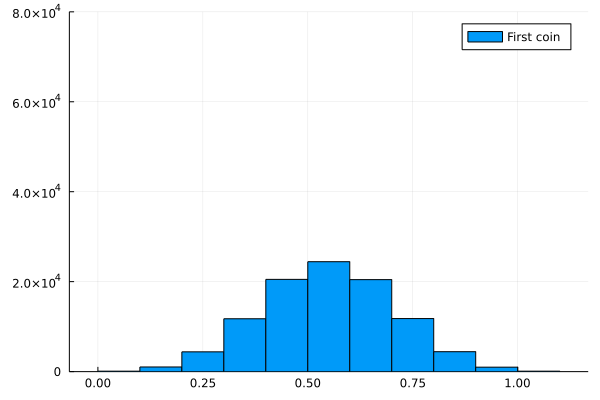

In [44]:
histogram(V1, bins=n_bins, ylims=ylims_plot, label = "First coin")

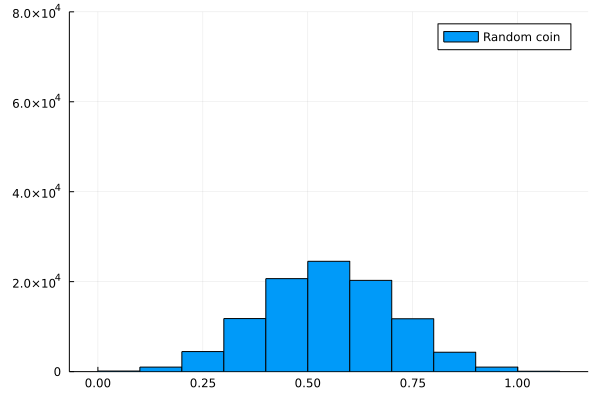

In [45]:
histogram(VR, bins=n_bins, ylims=ylims_plot, label = "Random coin")

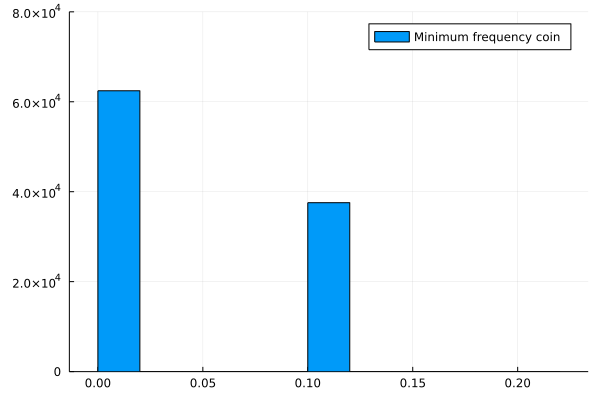

In [46]:
histogram(VM, bins=n_bins, ylims=ylims_plot, label = "Minimum frequency coin")

(c) Using (b), plot estimates for $P[|V-\mu|>\epsilon]$ as a function of $\epsilon$, together
with the Hoeffding bound(on the same graph).

In [51]:
# Hoeffding bound for epsilon and N
function hoeffding(ep, N)
    return 2.0*exp(-2.0*N*(ep^2))
end

epsilon = collect(0:0.01:0.5) # Range of values for epsilon
bounds = [hoeffding(ep,10) for ep in epsilon]; # Range of bounds for each epsilon given N = 10


In [52]:
# Values of P[|v-u|>e] to compare with hoeffding bound

vd_1 = [abs(v-0.5) for v in V1]
vd_rand = [abs(v-0.5) for v in VR]
vd_min = [abs(v-0.5) for v in VM]

l = size(epsilon)[1]
p1 = zeros(l)
prand = zeros(l)
pmin = zeros(l)

for i in 1:l
    ep = epsilon[i]
    p1[i] = count(i->(i>ep),vd_1)/100000
    prand[i] = count(i->(i>ep),vd_rand)/100000
    pmin[i] = count(i->(i>ep),vd_min)/100000
end

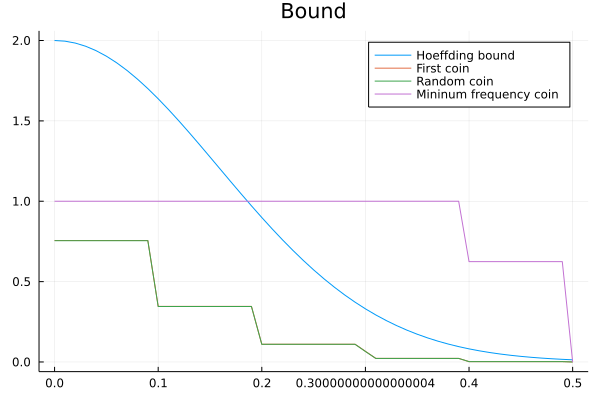

In [53]:
plot(epsilon, bounds,title = "Bound", formatter = identity, label = "Hoeffding bound", legend = :topright)
plot!(epsilon, p1, label = "First coin", legend = :topright)
plot!(epsilon, prand, label = "Random coin", lengend = :topright)
plot!(epsilon, pmin, label = "Mininum frequency coin", legend = :topright)

(e) Which coins obey the Hoeffding bound, and which ones do not? Explain why

The first coin and the random coin follow the hoeffding bound, however the coin with the minimum frequency of heads does not, and this is because the hypothesis on the latter is not fixed before the experiments occur, since we need to know the results in order to calculate a coin with these characteristics. This does not fulfill the condition imposed for the hoeffding bound to be satisfied.

(d) Relate part (d) to the multiple bins in Figure 1. 10.

When we calculate the coin that has the minimum frequency of heads it is as if we choose the bin out of 1000 bins, which is our hypothesis space. However we chose the bin after we finished sampling the data. 
This is in contrast to the result for the other two coins, which were chosen before sampling, which is choosing the bin beforehand.

# Exercise 1.11

(a) Can S produce a hypothesis that is guaranteed to perform better than random on a ny point outside 'D?

S cannot generate a hypothesis that claims to be better than a random choice at any point outside our data set. D could have 100% of data classified as -1, but this does not ensure a correct classification outside the set. On the other hand, a random function will have a 50% chance of generating a correct hypothesis, which is better compared to S.

(b) Assume for the rest of the exercise that all the examples in have $Y_n=+1$. Is it possible that the hypothesis that produces turns out to be better than the hypothesis that S produces?

Taking into account the previous paragraph, it is possible that C produces a better hypothesis than the one produced by S.

(c) If p = 0.9, what is the probability that S wi ll produce a better hypothesis than C?

If "almost all" points in D have +1, then S will choose hypothesis 1 and C will choose hypothesis 2. So outside of D, h_1 will have a 90% chance of matching f, while h_2 will have only a 10% chance.

(d) Is there any value of p for which it is more likely than not that C will produce a better hypothesis than S?

When p<0.5 C produces a better hypothesis than S, since C chooses produces hypothesis 2 which matches better with f.

# Exercise 1.12

The most promising option is (c), since on the one hand f could be a very complicated function and then we would not be able to learn with that amount of data, and on the other hand it may be that the dataset size is large enough, and the hoeffding bound would tell us that the probability that g and f behave similarly in the external data is high.